# Grad-CAM Visualization

## 1 Data loading

In [0]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


## 1.1 Setting Data Directories and Parameters

In [0]:
from numpy.random import seed
seed(137)
from tensorflow import set_random_seed
set_random_seed(191)        |                                             |

# Data Dirs
train_dir = "/gdrive/My Drive/newCircleData/Train/"
val_dir = "/gdrive/My Drive/newCircleData/Val/"
test_dir = "/gdrive/My Drive/newCircleData/Test/"

img_width = 600
img_height = 450
batch_size = 5
channels = 3
nb_train_samples = 395
nb_validation_samples = 145

## 1.2 Data loading

In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)             
val_datagen = ImageDataGenerator(rescale=1./255)              

train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(img_height, img_width),
        color_mode="rgb",
        batch_size=batch_size,
        shuffle = True,
        class_mode='categorical')   

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    color_mode="rgb",
    batch_size=batch_size,
    shuffle = True,
    class_mode='categorical') #weight toward one class or another

#Keras takes care of generating labels if the directory structure matches above!
label_mapT = train_generator.class_indices
print(label_mapT)

label_mapV = validation_generator.class_indices
print(label_mapV)

for data_batch, labels_batch in train_generator:
    print ('data batch shape:', data_batch.shape)
    #print(data_batch)
    print('labels batch shape:', labels_batch.shape)
    #print(labels_batch)
    break

Using TensorFlow backend.


Found 395 images belonging to 2 classes.
Found 145 images belonging to 2 classes.
{'G': 0, 'S': 1}
{'G': 0, 'S': 1}
data batch shape: (5, 450, 600, 3)
labels batch shape: (5, 2)


## 2 Model training

In [0]:
import numpy as np 
from keras.preprocessing import text, sequence
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.models import Model, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Softmax, Flatten, Dense, BatchNormalization 
from keras.metrics import categorical_accuracy
from keras import backend as K
from keras import regularizers
import tensorflow as tf
from keras.models import Sequential

from keras.callbacks import TensorBoard

#from keras.layers import Input, Dense
from keras.models import Model

input_shape = (img_height, img_width, channels)

model = Sequential()

model.add(Conv2D(32,(3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(BatchNormalization())

model.add(Conv2D(32,(3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(BatchNormalization())

model.add(Conv2D(64,(3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2)) #2
model.add(Activation('softmax')) #softmax






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 448, 598, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 448, 598, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 224, 299, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 222, 297, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 222, 297, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 148, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 109, 146, 64)     

In [0]:
epochs = 15

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples / batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples / batch_size,
    shuffle=True)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/15





79/79 [==============================] - 178s 2s/step - loss: 4.4233 - acc: 0.7139 - val_loss: 2.9849 - val_acc: 0.8138
Epoch 2/15
79/79 [==============================] - 12s 149ms/step - loss: 4.5055 - acc: 0.7139 - val_loss: 2.9849 - val_acc: 0.8138
Epoch 3/15
79/79 [==============================] - 12s 150ms/step - loss: 2.2393 - acc: 0.8177 - val_loss: 0.6123 - val_acc: 0.8828
Epoch 4/15
79/79 [==============================] - 12s 149ms/step - loss: 0.4497 - acc: 0.9114 - val_loss: 0.1954 - val_acc: 0.9586
Epoch 5/15
79/79 [==============================] - 12s 151ms/step - loss: 0.2740 - acc: 0.9367 - val_loss: 0.3484 - val_acc: 0.9172
Epoch 6/15
79/79 [==============================] - 12s 149ms/step - loss: 0.3378 - acc: 0.9291 - val_loss: 0.1342 - val_acc: 0.9655
Epoch 7/15
79/79 [==============================] - 12s 150ms/step - loss: 0.2106 - acc: 0.9468 - va

## 3 Prediction

In [0]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_height, img_width),
        color_mode="rgb",
        class_mode="categorical",
        shuffle=False,
        batch_size=batch_size)

filenames = test_generator.filenames
nb_samples = len(filenames)

predict = model.predict_generator(test_generator, steps = np.ceil(nb_samples / batch_size))
    
# Getting binary prediction
predict = np.round_(predict)

model.evaluate_generator(test_generator, steps = np.ceil(nb_samples / batch_size))

Found 135 images belonging to 2 classes.


[1.7255250902945187, 0.8296296364731259]

## 4 Model visualization

## 1 Preamble downloading

In [0]:
!pip install git+https://github.com/raghakot/keras-vis.git

from keras.applications import ResNet50
from vis.utils import utils
from keras import activations

# Hide warnings on Jupyter Notebook
import warnings
warnings.filterwarnings('ignore')

  Cloning https://github.com/raghakot/keras-vis.git to /tmp/pip-req-build-eig91w07
  Running command git clone -q https://github.com/raghakot/keras-vis.git /tmp/pip-req-build-eig91w07
  Created wheel for keras-vis: filename=keras_vis-0.5.0-py2.py3-none-any.whl size=38887 sha256=71d8b3ab746bb80b4cc43eed7d02be201edfaa076357c1959cfa82854ac9d25d
  Stored in directory: /tmp/pip-ephem-wheel-cache-qb4vo3v2/wheels/c5/ae/e7/b34d1cb48b1898f606a5cce08ebc9521fa0588f37f1e590d9f
Successfully built keras-vis
  Found existing installation: keras-vis 0.4.1
    Uninstalling keras-vis-0.4.1:
      Successfully uninstalled keras-vis-0.4.1


## 2 Display images (to make sure the intended ones are shown)

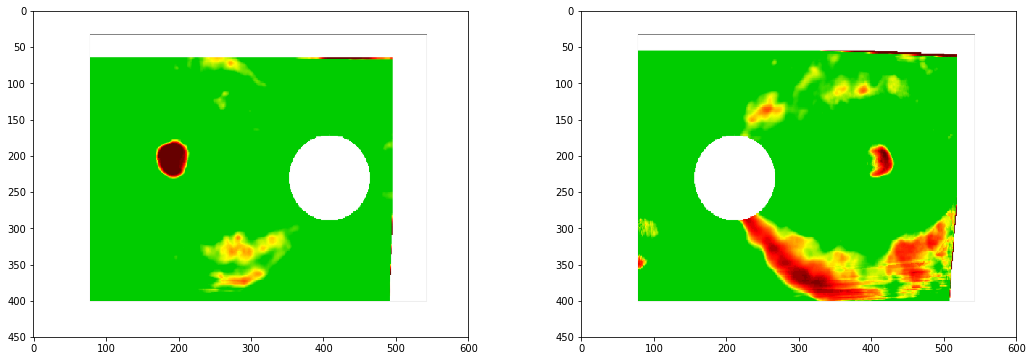

In [0]:
from vis.utils import utils
from matplotlib import pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (18, 6)


img1 = utils.load_img('/gdrive/My Drive/FNrecentResNet/FN/COL13540182OD2016-10-17wideProbRNFL-2.png', target_size=(img_height, img_width))
img2 = utils.load_img('/gdrive/My Drive/FNrecentResNet/FN/COL214COL214OS2017-10-12widefieldProbRNFL.png', target_size=(img_height, img_width))


f, ax = plt.subplots(1, 2)
ax[0].imshow(img1)
ax[1].imshow(img2)

### 3 Attention heatmap displayed on grayscale image

Current type is /FN/


<Figure size 1296x432 with 0 Axes>

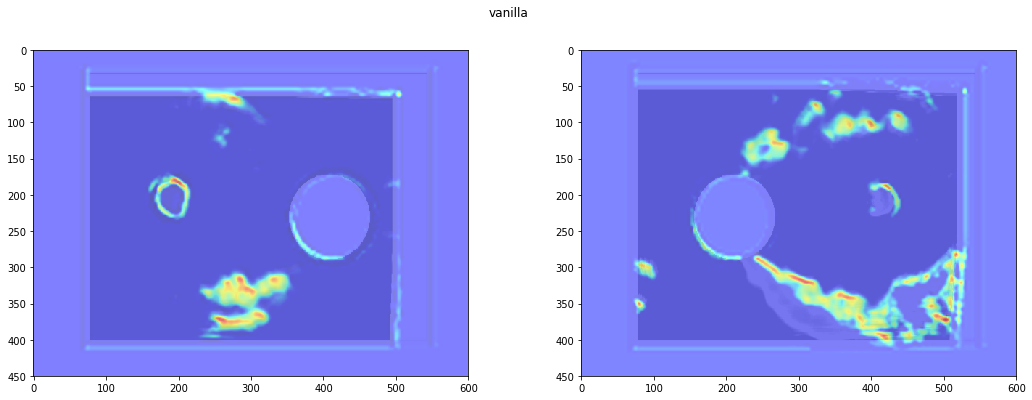

<Figure size 1296x432 with 0 Axes>

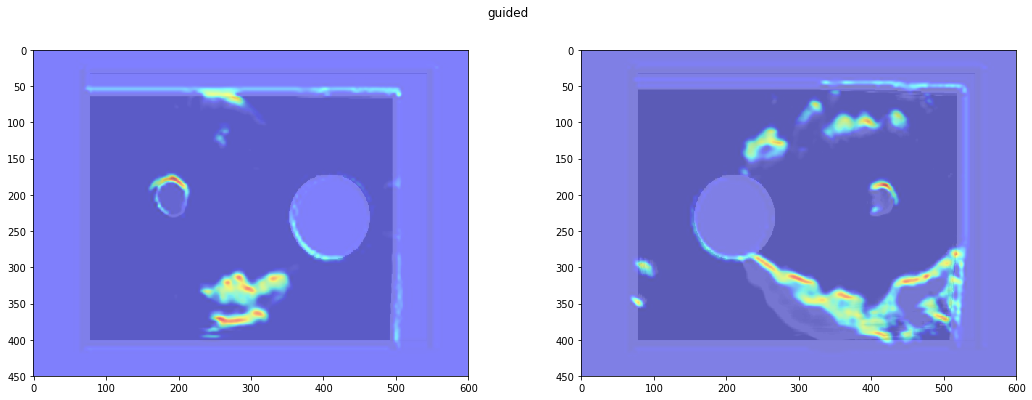

<Figure size 1296x432 with 0 Axes>

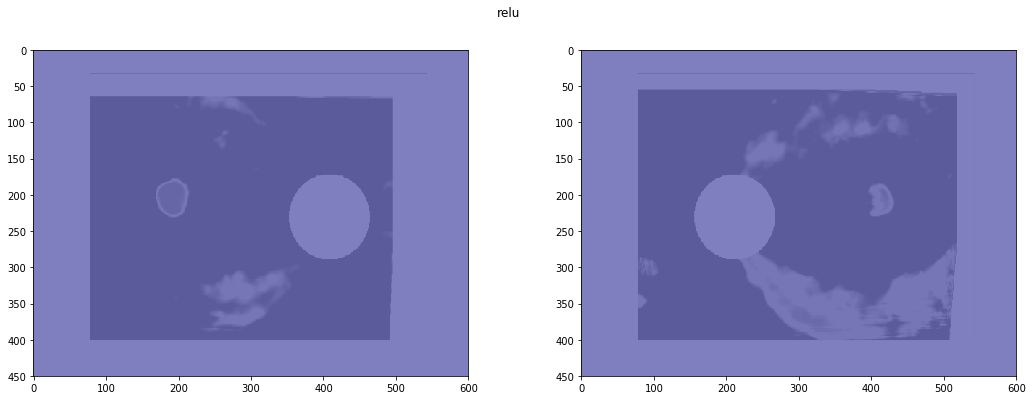

In [0]:
from vis.visualization import visualize_saliency, overlay
from vis.utils import utils
from keras import activations
from vis.visualization import visualize_cam
import matplotlib.cm as cm
import os

FPFN_dir =  "/gdrive/My Drive/FNrecentResNet"
FN_list = os.listdir("/gdrive/My Drive/FNrecentResNet/FN")
FP_list = os.listdir("/gdrive/My Drive/FNrecentResNet")

cur_list = None
cur_type = None

# For FP_list
# cur_list = FP_list
# cur_type = '/FP/'

# For FN_list
cur_list = FN_list
cur_type = '/FN/'

imglist = []

print ("Current type is " + cur_type)

for i in range(len(cur_list)):
   imglist.append(utils.load_img(FPFN_dir + cur_type + cur_list[i], target_size=(img_height, img_width)))
    
from google.colab import files
from PIL import Image

# Convert RBG to Grey-scale
def converter(x):
    #x has shape (width, height, channels)
    return (0.21 * x[:,:,:1]) + (0.72 * x[:,1:2]) + (0.07 * x[:,:,-1:])

penultimate_layer = utils.find_layer_idx(model, 'conv2d_3') #conv2d_3
layer_idx = utils.find_layer_idx(model, 'dense_2') #dense_2

for modifier in [None, 'guided', 'relu']:
    plt.figure()
    f, ax = plt.subplots(1, 2)
    plt.suptitle("vanilla" if modifier is None else modifier)
    for i, img in enumerate([img1, img2]):    
        
        grads = visualize_cam(model, layer_idx, filter_indices=None, 
                              seed_input=img, penultimate_layer_idx=penultimate_layer,
                              backprop_modifier=modifier)        
        
        # Lets overlay the heatmap onto original image.    
        jet_heatmap = np.uint8(cm.jet(grads)[..., :3] * 255)
        #jet_heatmap = np.uint8(cm.jet(grads) * 255)[:, : , :, 0]
        grey_img = converter(img)

        ax[i].imshow(overlay(jet_heatmap, grey_img))

### 3 Attention heatmap displayed on the original RGB image

<Figure size 1296x432 with 0 Axes>

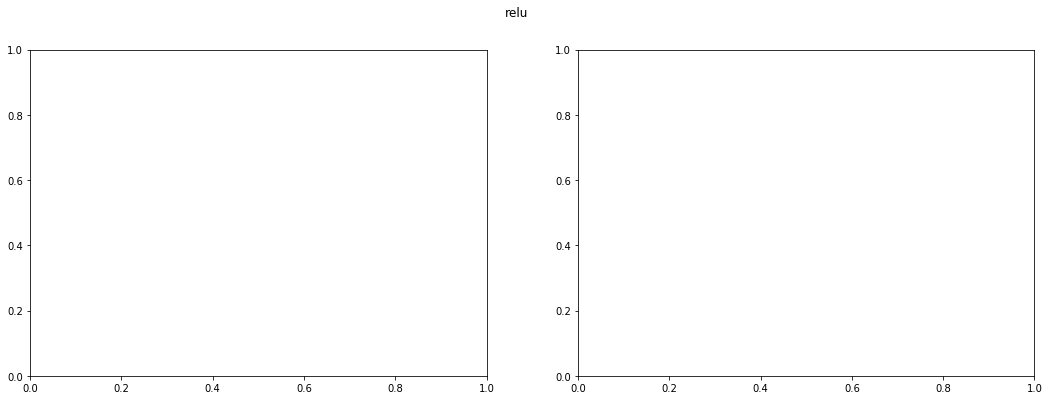

<Figure size 1296x432 with 0 Axes>

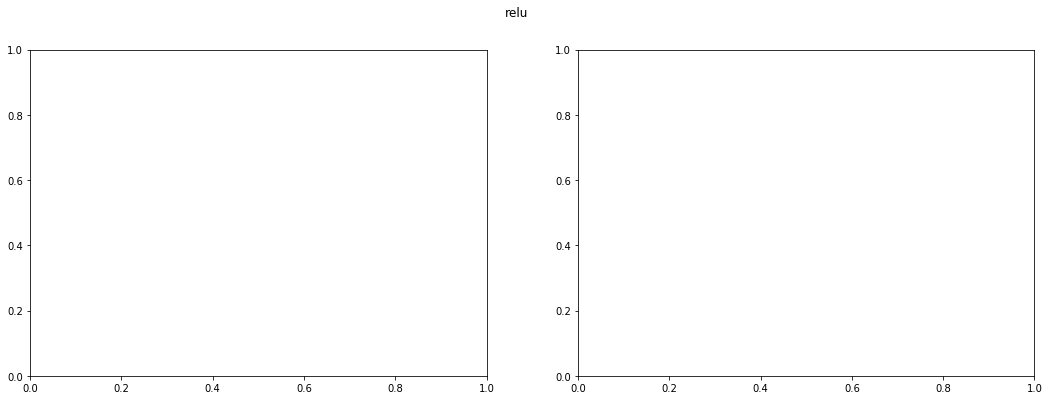

<Figure size 1296x432 with 0 Axes>

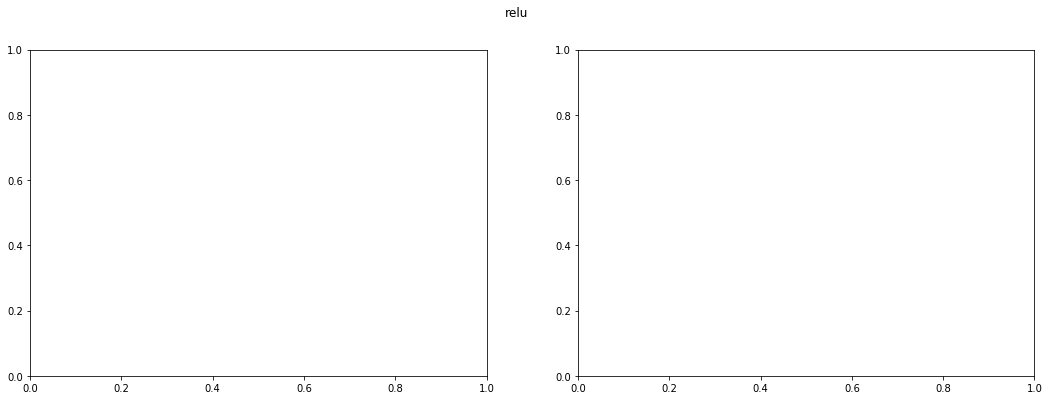

<Figure size 1296x432 with 0 Axes>

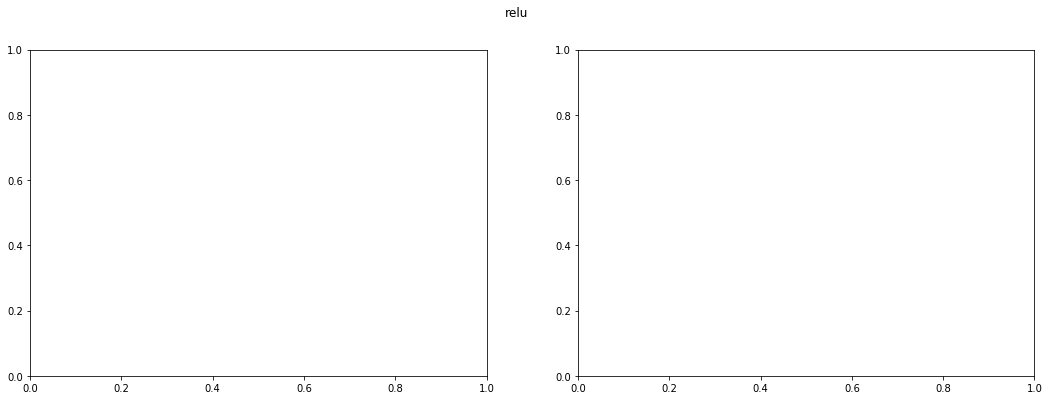

<Figure size 1296x432 with 0 Axes>

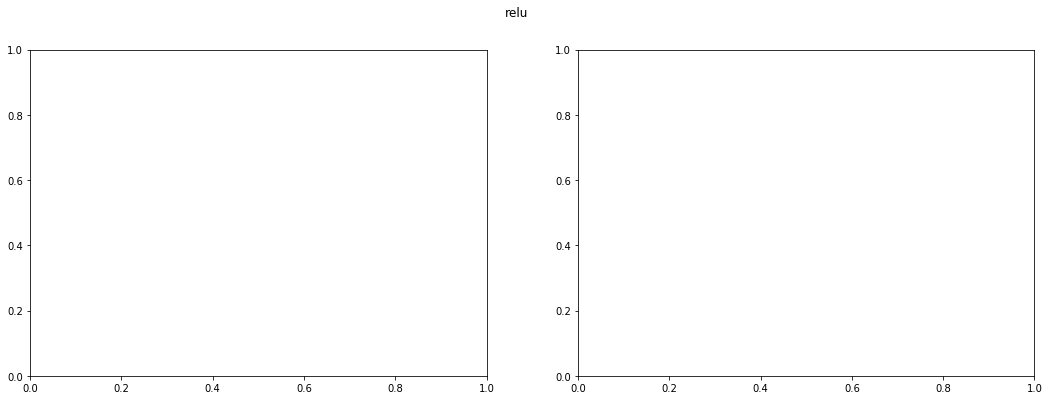

<Figure size 1296x432 with 0 Axes>

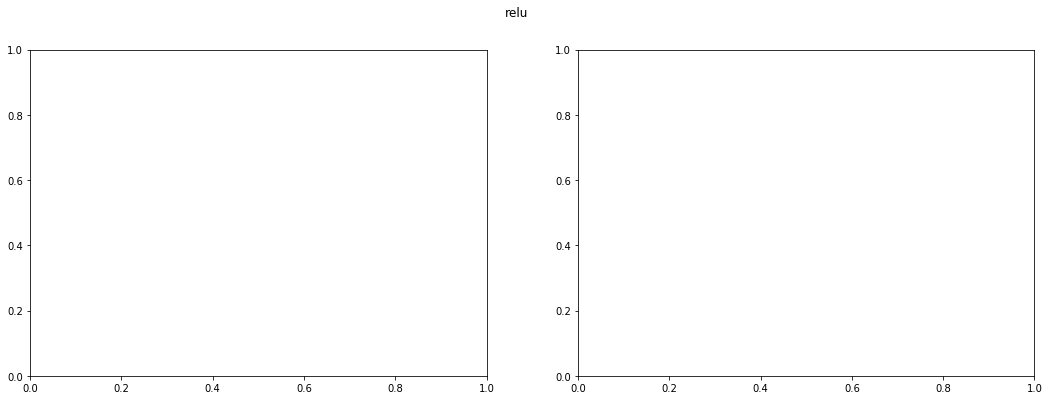

<Figure size 1296x432 with 0 Axes>

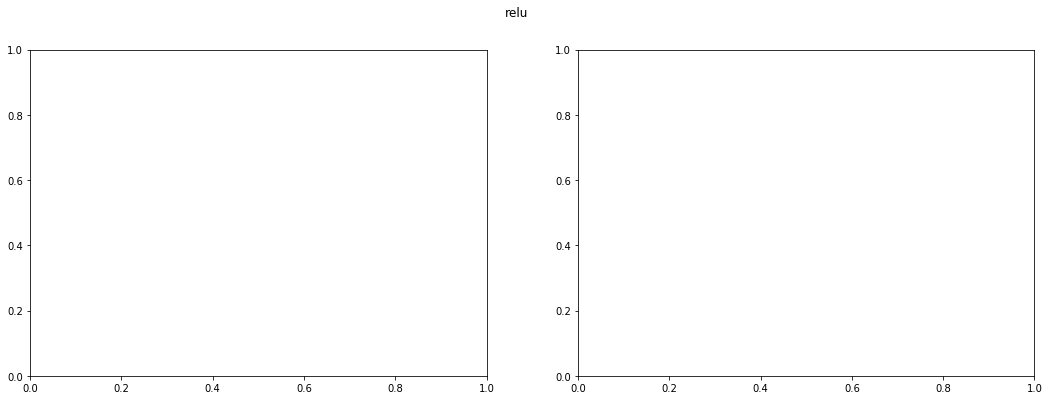

<Figure size 1296x432 with 0 Axes>

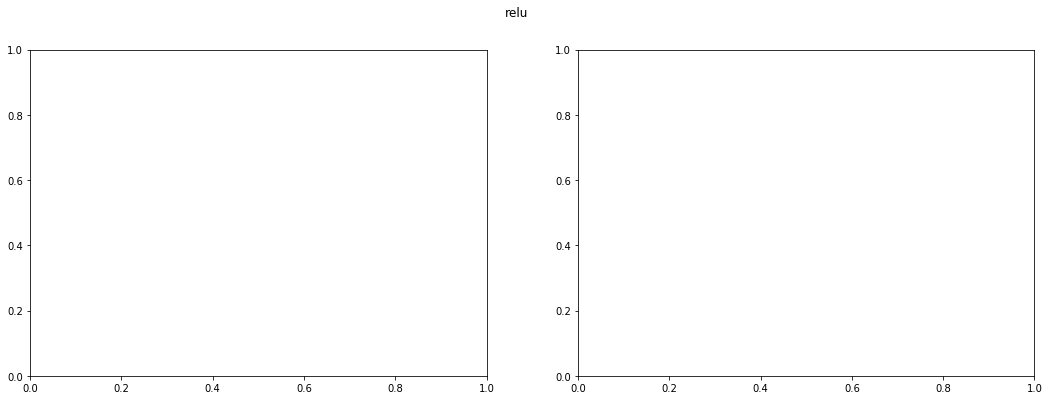

<Figure size 1296x432 with 0 Axes>

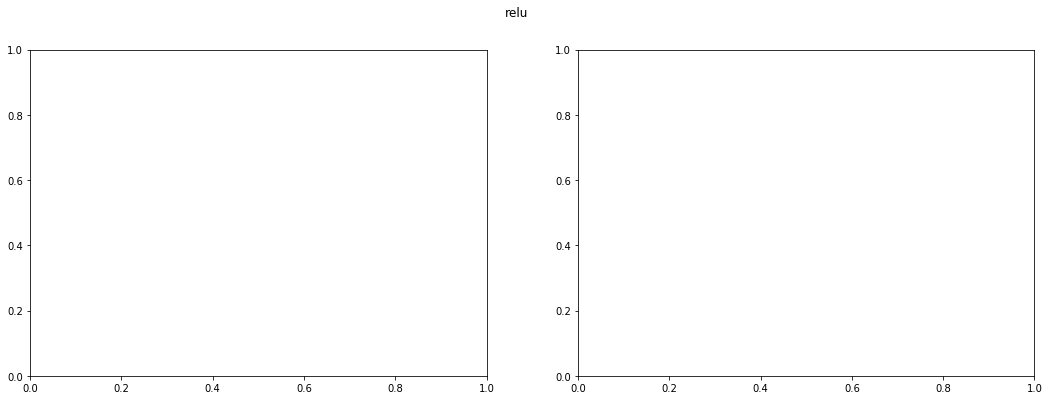

<Figure size 1296x432 with 0 Axes>

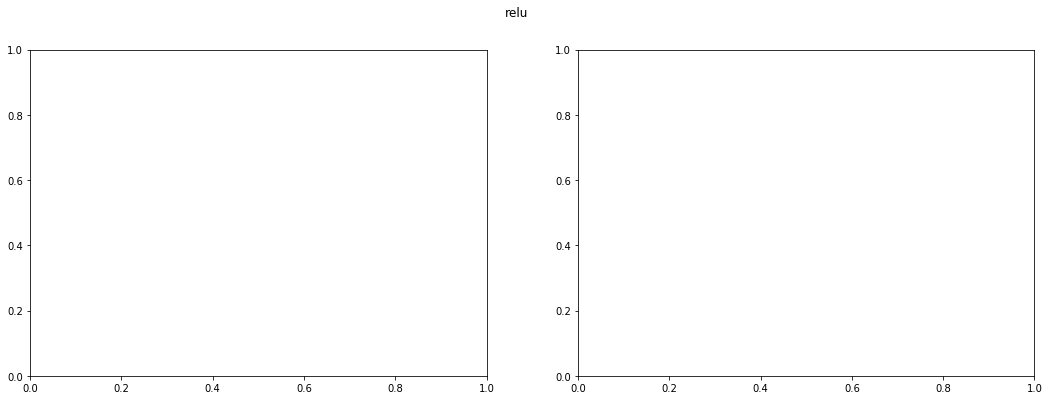

<Figure size 1296x432 with 0 Axes>

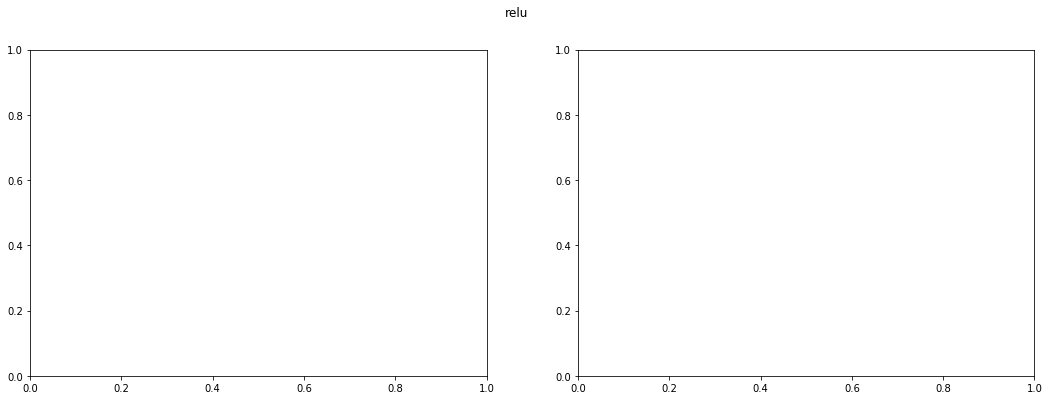

<Figure size 1296x432 with 0 Axes>

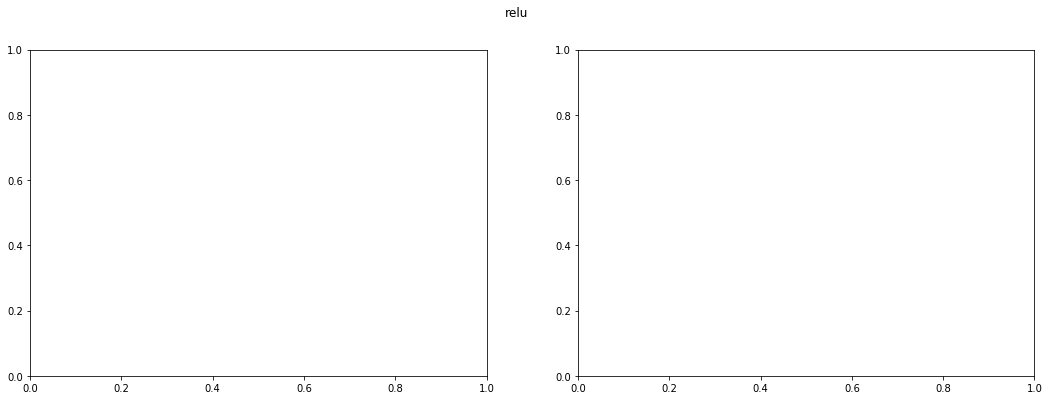

<Figure size 1296x432 with 0 Axes>

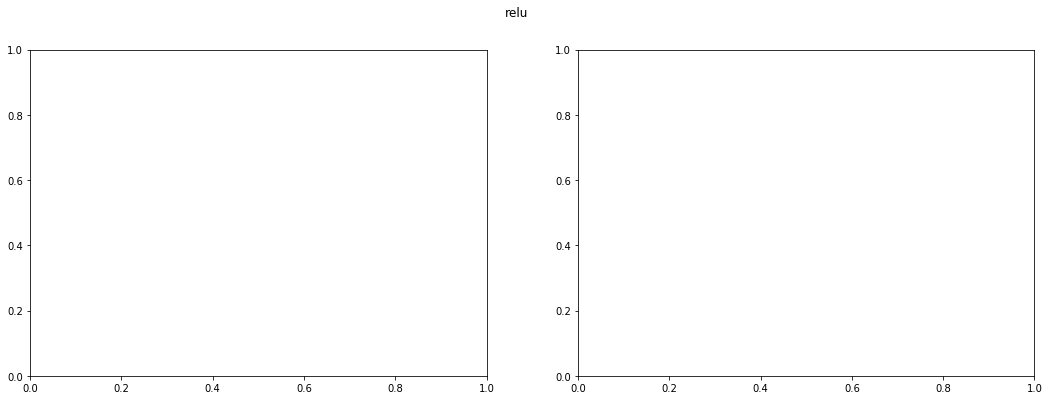

<Figure size 1296x432 with 0 Axes>

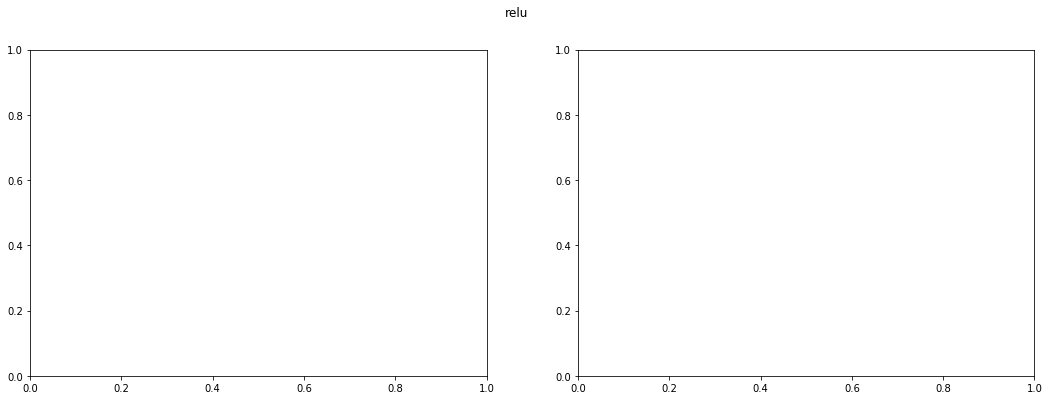

<Figure size 1296x432 with 0 Axes>

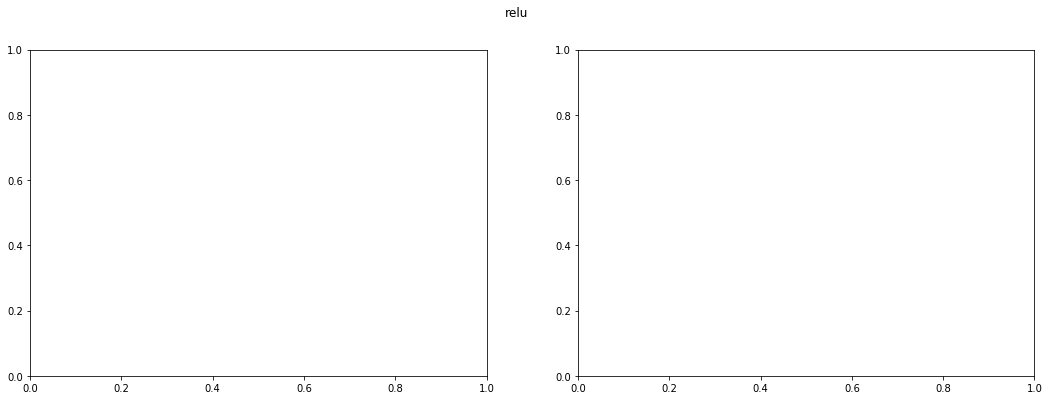

<Figure size 1296x432 with 0 Axes>

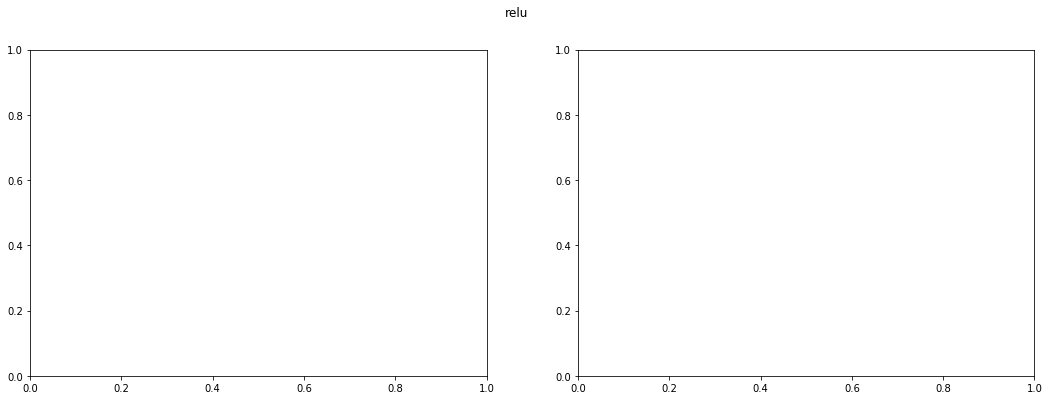

<Figure size 1296x432 with 0 Axes>

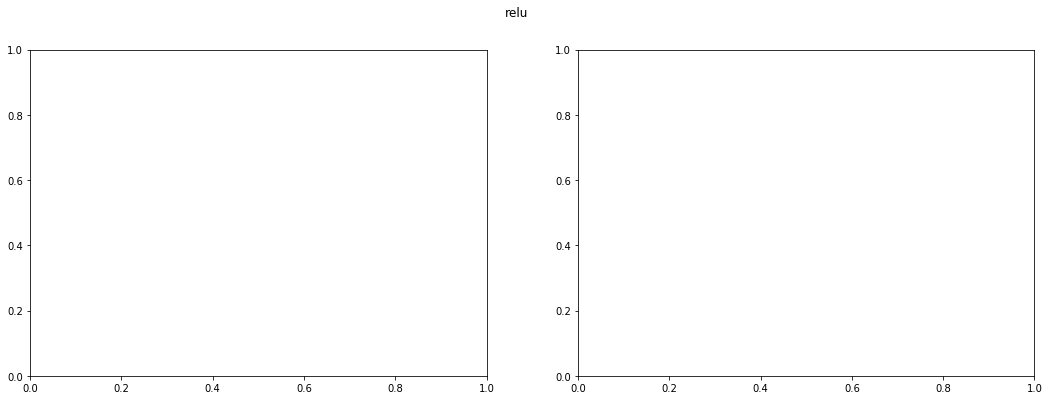

<Figure size 1296x432 with 0 Axes>

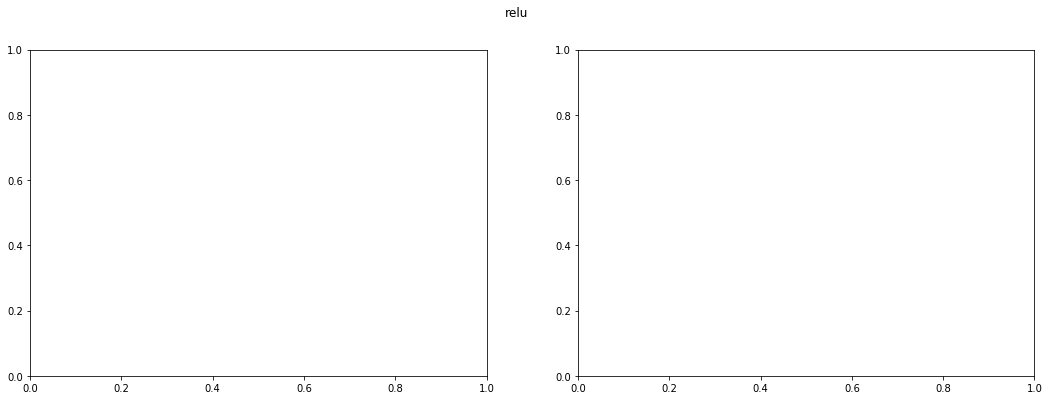

<Figure size 1296x432 with 0 Axes>

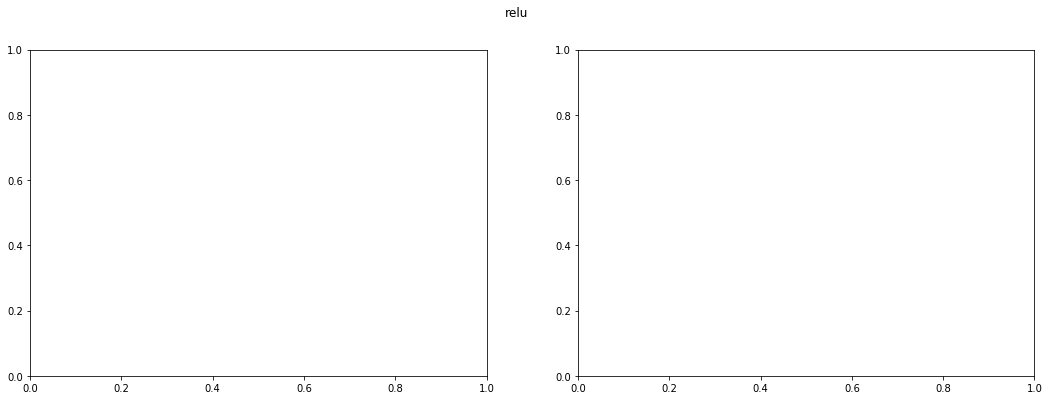

<Figure size 1296x432 with 0 Axes>

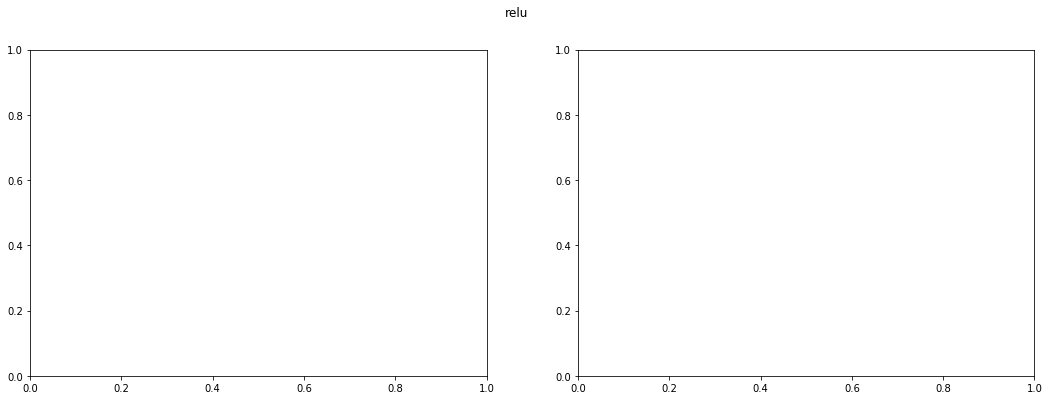

<Figure size 1296x432 with 0 Axes>

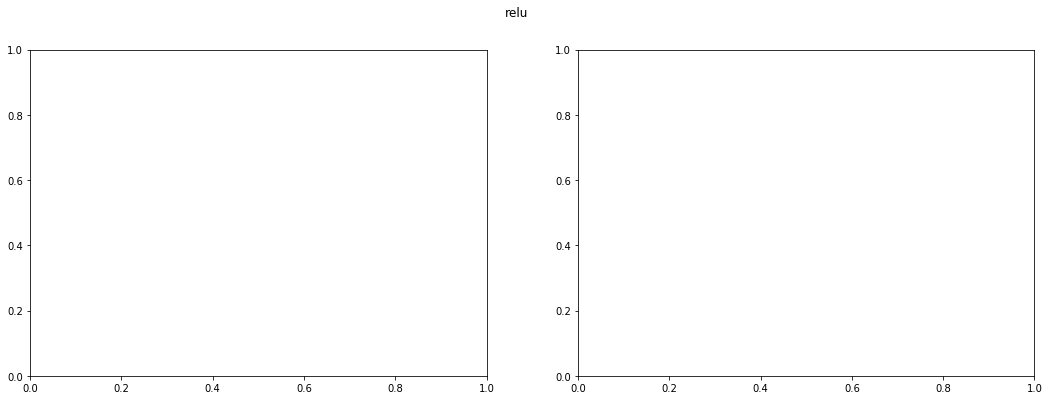

<Figure size 1296x432 with 0 Axes>

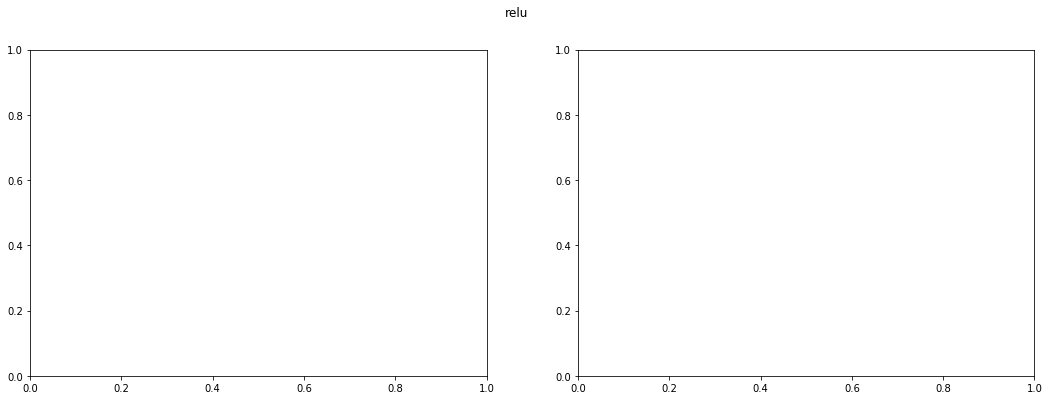

<Figure size 1296x432 with 0 Axes>

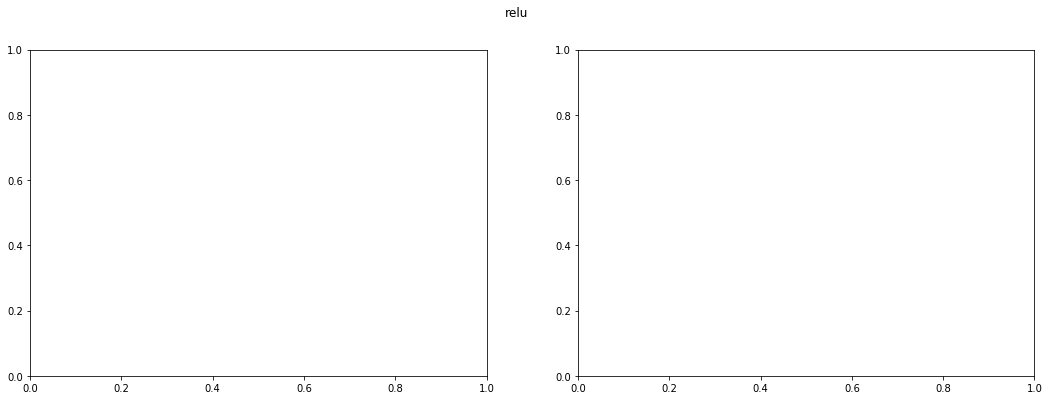

<Figure size 1296x432 with 0 Axes>

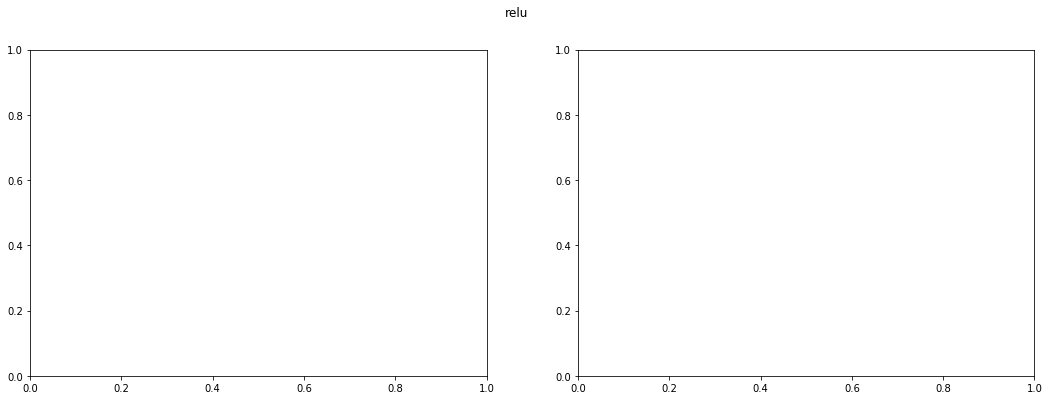

<Figure size 1296x432 with 0 Axes>

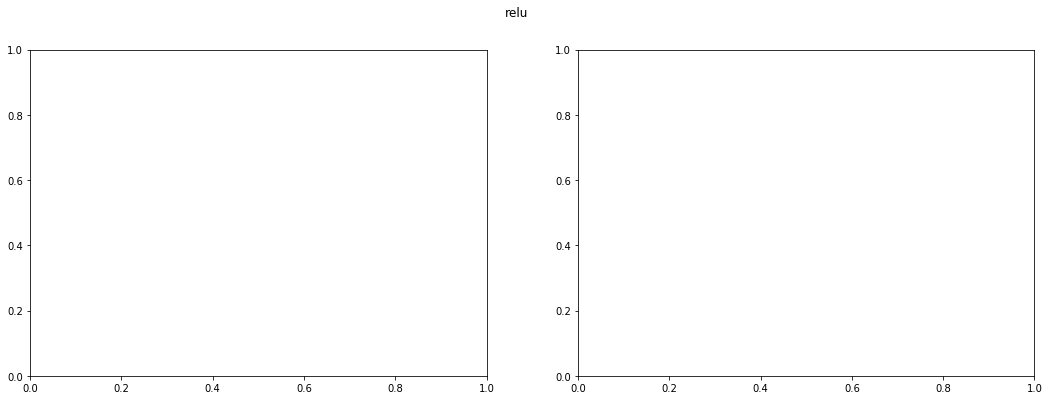

<Figure size 1296x432 with 0 Axes>

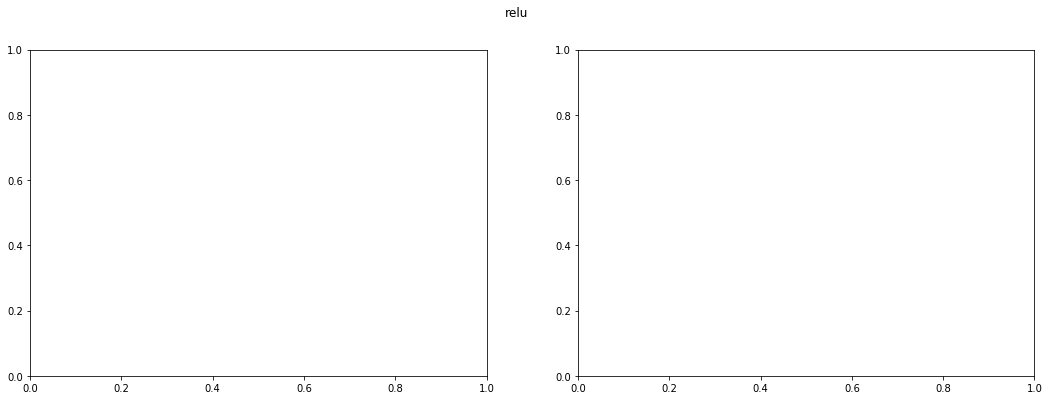

<Figure size 1296x432 with 0 Axes>

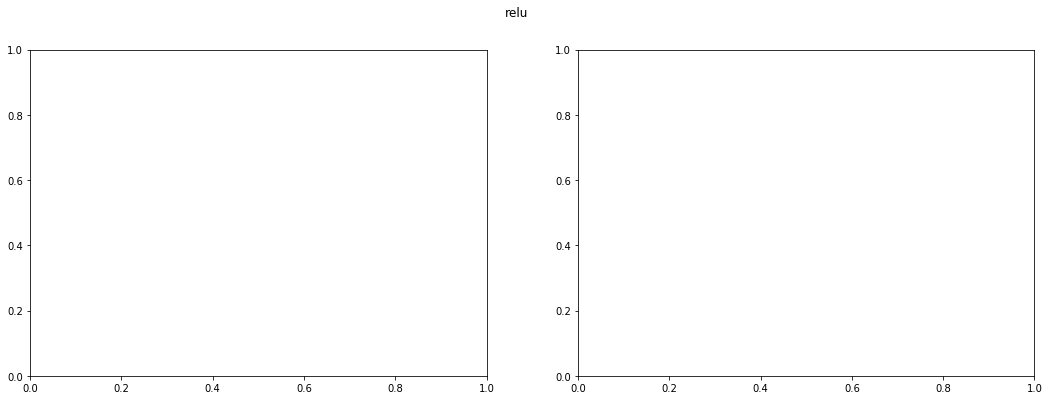

<Figure size 1296x432 with 0 Axes>

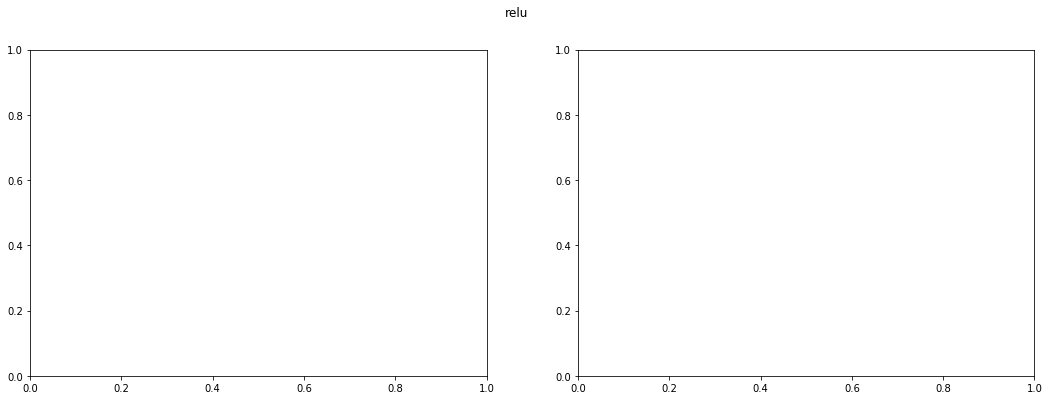

<Figure size 1296x432 with 0 Axes>

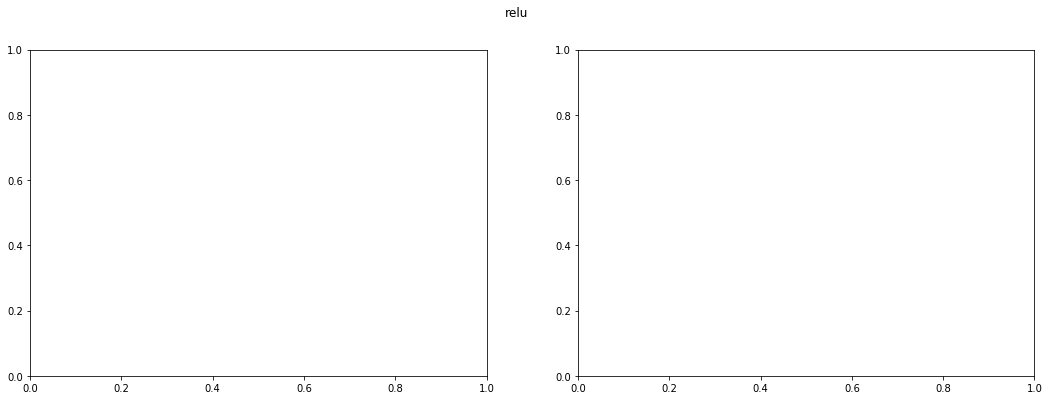

<Figure size 1296x432 with 0 Axes>

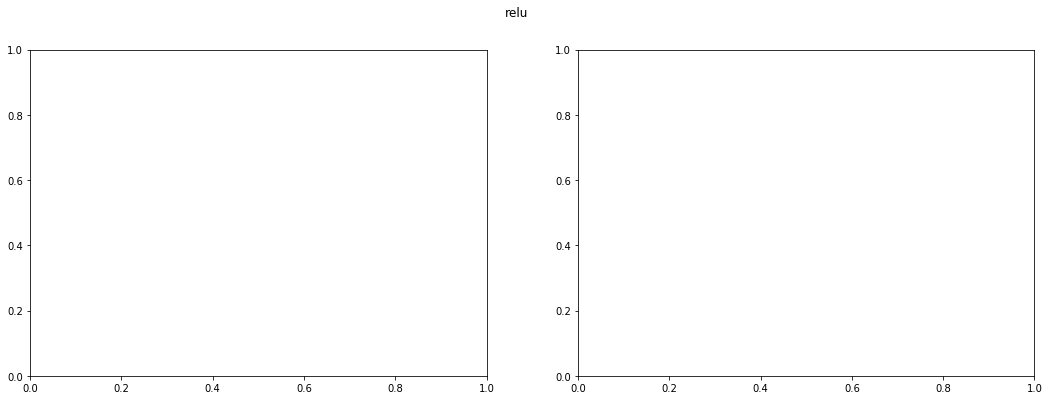

<Figure size 1296x432 with 0 Axes>

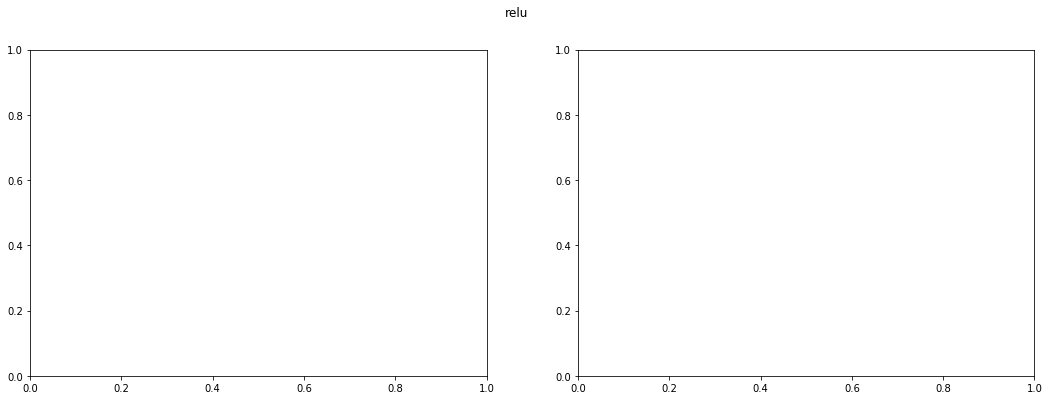

<Figure size 1296x432 with 0 Axes>

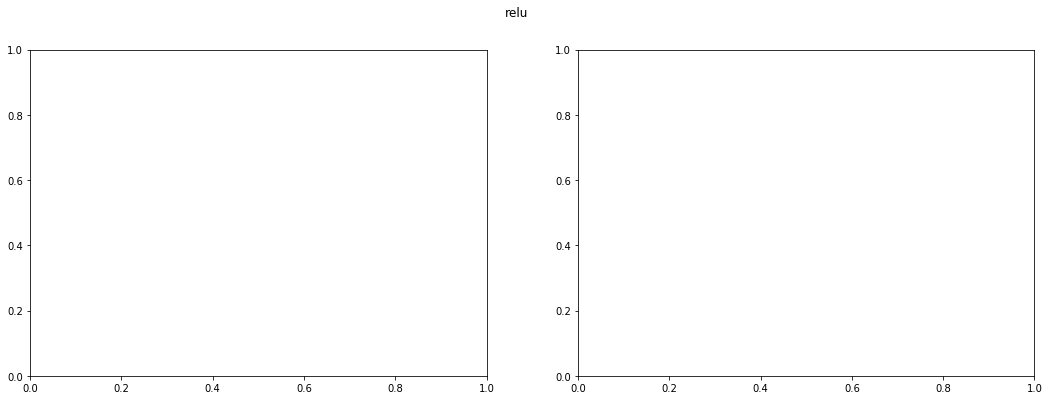

<Figure size 1296x432 with 0 Axes>

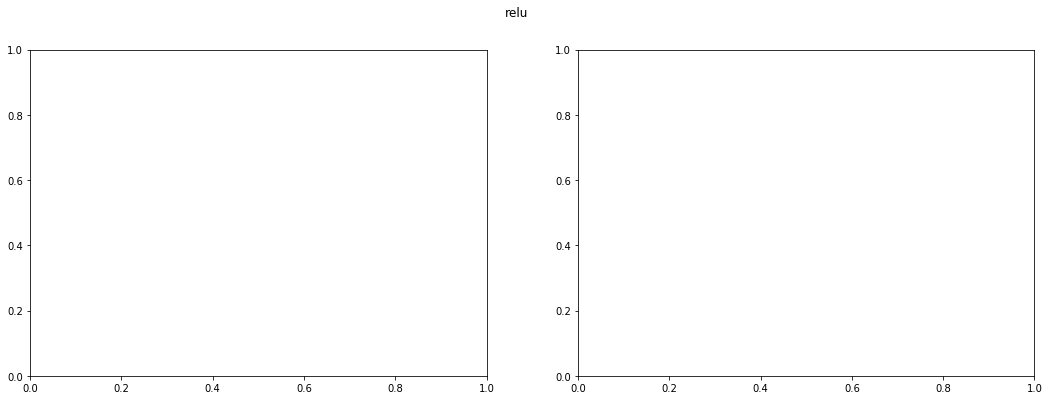

<Figure size 1296x432 with 0 Axes>

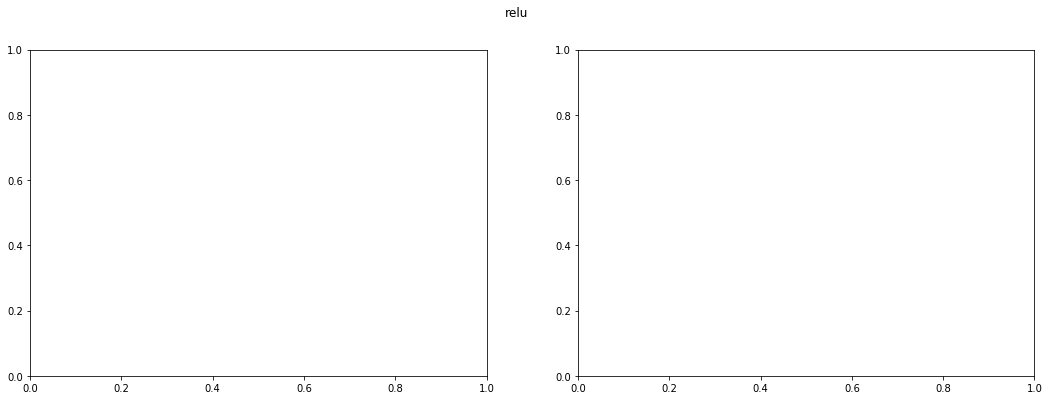

<Figure size 1296x432 with 0 Axes>

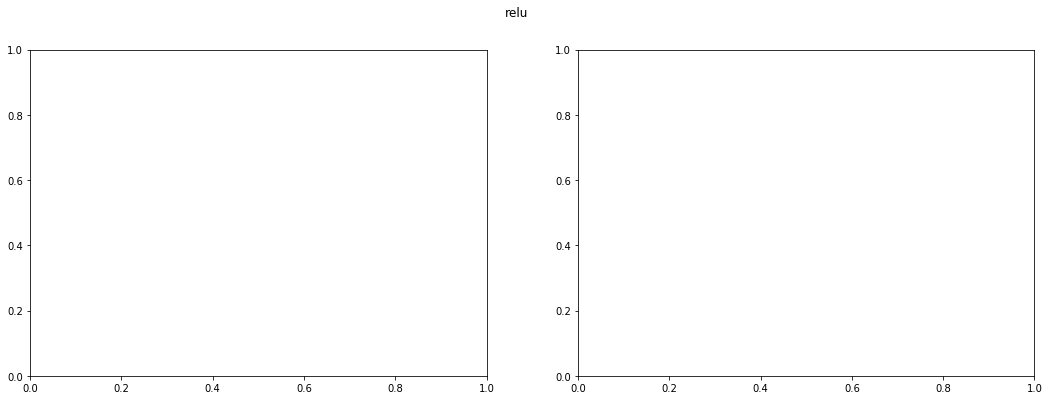

In [0]:
for modifier in ['relu']:
    for i, img in enumerate(imglist):    
      plt.figure()
      f, ax = plt.subplots(1, 2)
      plt.suptitle("vanilla" if modifier is None else modifier)
 
    for i, img in enumerate(imglist): #FP_imglist):    
      # 20 is the imagenet index corresponding to `ouzel`
      grads = visualize_cam(model, layer_idx, filter_indices=0, seed_input=img, 
                            penultimate_layer_idx=penultimate_layer, 
                            backprop_modifier=modifier)
      
      # Lets overlay the heatmap onto original image.    
      #jet_heatmap = np.unit8(cm.jet(grads)[..., :3] * 255)
      jet_heatmap = np.uint8(cm.jet(grads) * 255)[..., :3]#jet_heatmap = np.uint8(cm.jet(grads) * 255)[:, : , :, 0]
      #ax[i].imshow(overlay(jet_heatmap, img))
      save_img = overlay(jet_heatmap, img)
      im = Image.fromarray(save_img)
      im.save(str(i)+".png")
      files.download(str(i)+".png")
      #ax[i + 2].imshow(img)
      #ax[i].imshow(overlay(jet_heatmap, img))